# Linear Regression - Bike Sharing Assignment
## Murlidhar Maindargikar
## PGDDS Feb-20 batch

# ---------------------------------------Start of Assignment--------------------------------------------

# Step 1: Reading and Understanding the Data

In [184]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
import numpy as np
import pandas as pd

In [186]:
bike = pd.read_csv("day.csv")

In [187]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [188]:
# Check the shape of the dataset
bike.shape

(730, 16)

In [189]:
# Onserving the dataset column and datatype
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [190]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [191]:
# Checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values present in the data set.

# Step 2: Converting season and weathersit column values in string

#### As per data dictionary below are weather situations
##### 1: Clear, Few clouds, Partly cloudy, Partly cloudy-----------------------------------------------------------------> clear
##### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist---------------------------------------------> cloudy
##### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ---> rainy
##### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -------------------------------------------->snowy

Numerical values for Weather situations are converted into 'clear', 'cloudy', 'rainy' and 'snowy' categorical values.

In [192]:
bike['weathersit'] = bike['weathersit'].map({1:'clear', 2:'cloudy', 3:'rainy', 4:'snowy'})

Numerical values for season variable are converted in to 'spring', 'summer', 'fall' and 'winter' categorical values.

In [193]:
bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

Numerical values for mnth variable are converted in to 'Jan' to 'Dec' categorical values.

In [194]:
bike['mnth'] = bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                                9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

Numerical values for weekday variable are converted in to 'Sun' to 'Sat' categorical values.

In [195]:
bike['weekday'] = bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [196]:
# Checking bike dataframe to validate all above columns are converted to proper categories

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [197]:
# Checking bike dataframe to validate all above columns data types are converted properly
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [198]:
# Creating columns list as per numerical and catogorical for univariate and bivariate analysis

column_numerical = ['instant','temp', 'atemp', 'hum', 'windspeed','casual', 'registered']

column_categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Step 3 -  Univariate Analysis

### Categorical Variables - Univriate Analysis

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

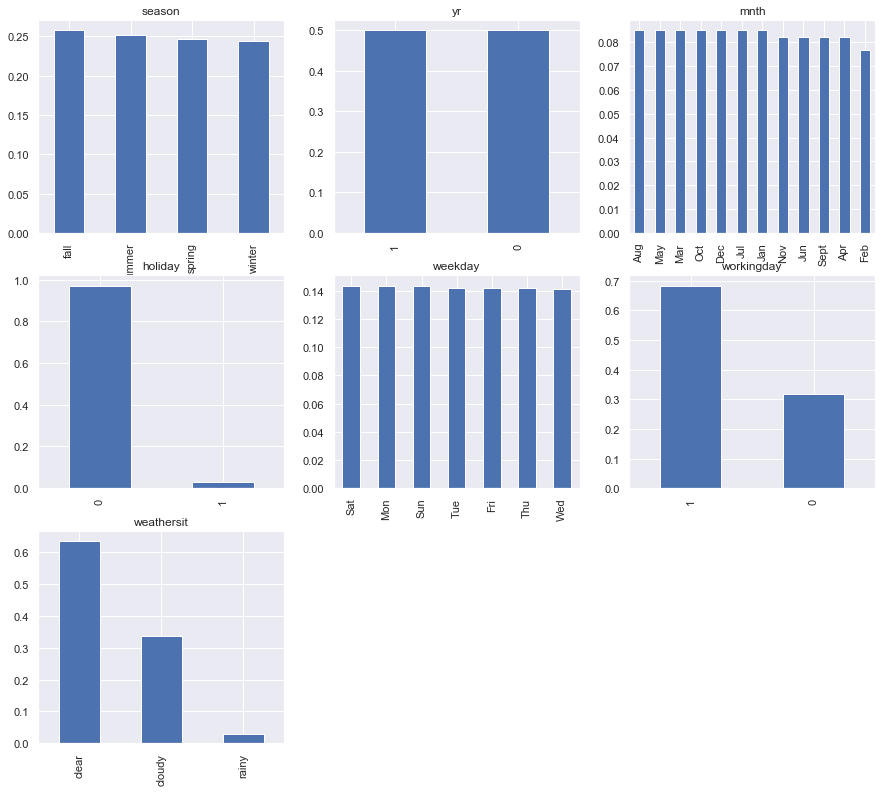

In [200]:
#Plotting bar charts for Categorical Columns for univariate analysis

sns.set(style = "darkgrid")
plt.figure(1)
plt.figure(figsize=(15,18))

i = 1

for item in column_categorical:
    plt.subplot(4, 3, i)
    plt.title(item)
    bike[item].value_counts(normalize = True).plot.bar()
    i = i+1

plt.show()


Inferences from above categorical univariate analysis : 
1. weathersit - For clear weather there are more use of bikes.
2. workingday - For working day there is more use of bikes.

### Numerical Variables - Univriate Analysis

<Figure size 432x288 with 0 Axes>

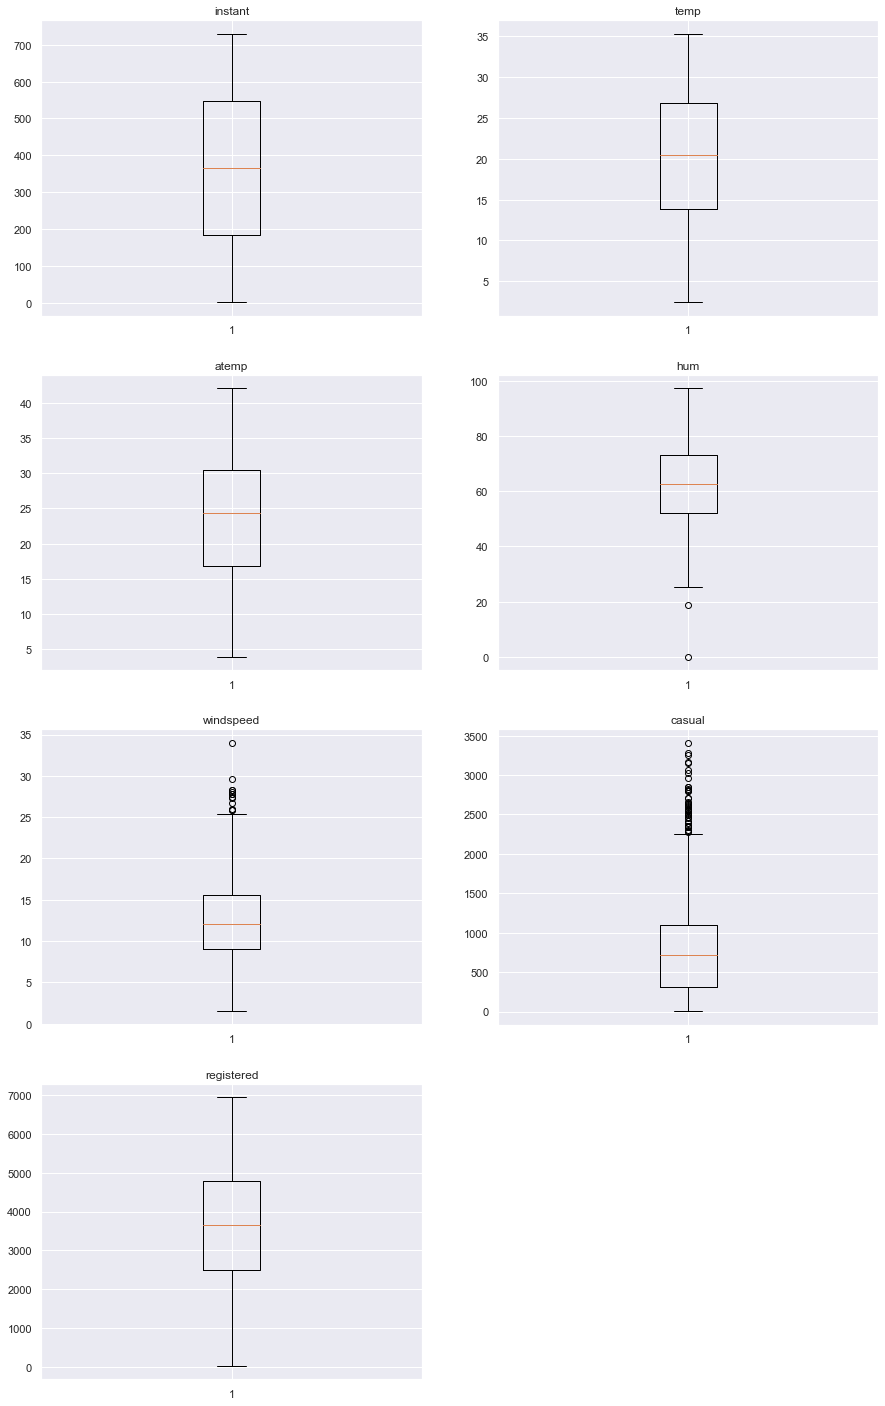

In [201]:
#Plotting Box Plots for Numerical columns for univariate analsyis

plt.figure(2)
plt.figure(figsize=(15,25))

i = 1

for item in column_numerical:
    plt.subplot(4, 2, i)
    ax = plt.boxplot(bike[item].dropna())
    plt.title(item)
    i = i+1
    
plt.show()

Inferences from above numerical univariate analysis :
1. All numerical variables have values well within max and min range except 'hum', 'windspeed' and 'casual' column
2. Outliers are present for 'hum', 'windspeed' and 'casual' column
3. Looking towards data for 'windspeed', windspeed may have outlier value because of some natural events like strom for one day so we will not treat this outlier value.
4. For 'casual' column, ourlier values are increasing in continuous manner so we will not treat them either.
5. For 'hum' column, outlier is below min and it is zero, but zero humidity will not be possible so we need to treat these outtier value.

In [202]:
bike.loc[bike['hum'] == 0, 'hum'].value_counts()

0.0    1
Name: hum, dtype: int64

In [203]:
bike['hum'].sort_values()

68      0.0000
49     18.7917
461    25.4167
462    27.5833
450    29.0000
        ...   
64     94.8261
339    94.9583
325    96.2500
340    97.0417
265    97.2500
Name: hum, Length: 730, dtype: float64

Humidity column has only one value as 0 so we will cap this value with minimum value which is 18.7917

In [204]:
bike.loc[bike['hum'] == 0, 'hum'] = 18.7917

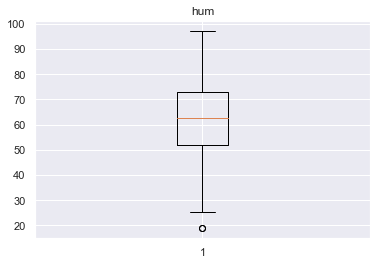

In [205]:
plt.boxplot(bike['hum'].dropna())
plt.title('hum')
plt.show()

Box plot for humidity column when outlier value is treated.

# Step 4 - Bivariate Analysis
### Numerical to Numerical - Bivariate Analysis

<Figure size 432x288 with 0 Axes>

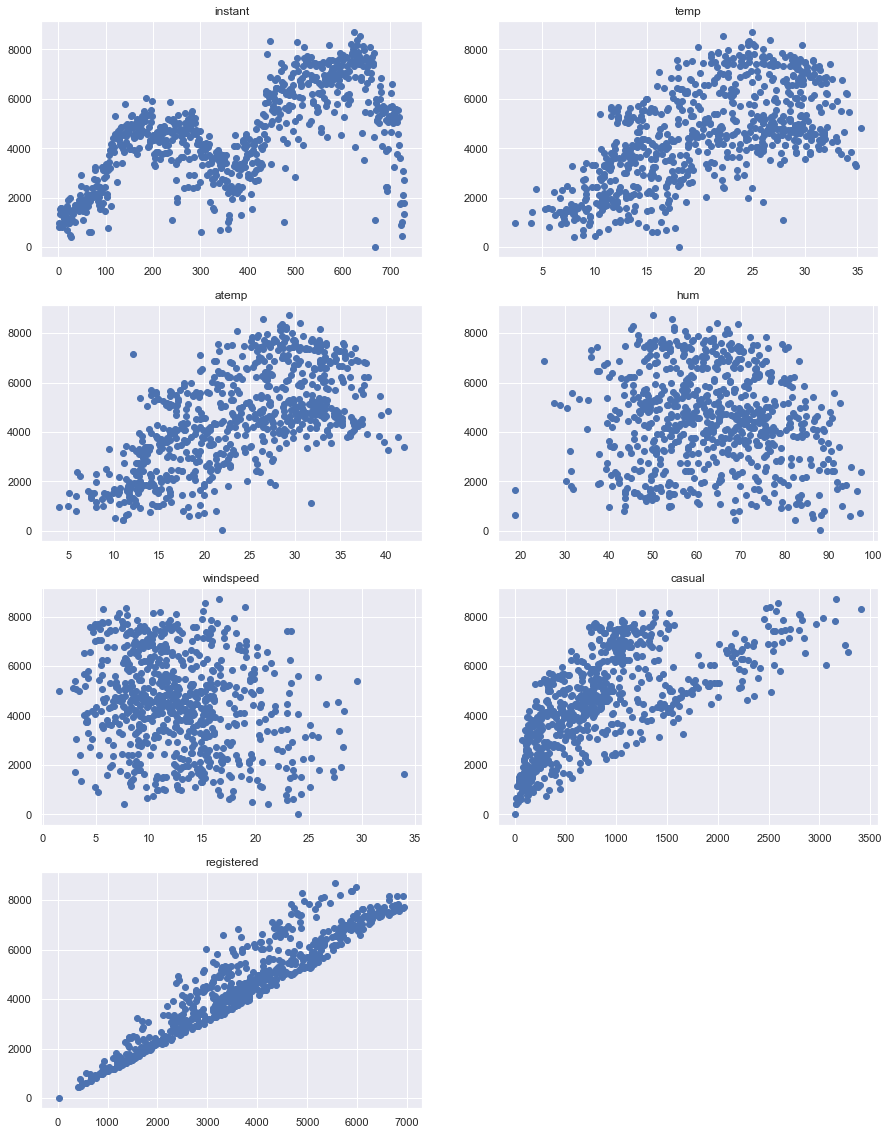

In [206]:
#Plotting scatter plots to check the relationship between 'cnt' variable and other numerical columns.

sns.set(style = "darkgrid")
plt.figure(1)
plt.figure(figsize=(15,20))

i = 1

for item in range(len(column_numerical)):
    plt.subplot(4, 2, i)
    plt.title(column_numerical[item])
    plt.scatter(x = bike[column_numerical[item]], y = bike['cnt'])
    i = i+1

plt.show()

Inferences from Numerical to Numerical - Bivariate Analysis : 
1. For 'instant' variable, there no liniear relation ship with 'cnt' cariable due to change in pattern.
2. There is a positive linear relationship of 'cnt' variable with 'reagistered','casual', 'temp', 'atemp' variables.
3. There is a linear relationship of 'cnt' variable with 'hum', 'windspeed' variables. But as of now it is difficult to explain whether it is low positive or negative linear relationship. We need to build the linear regression model for the same.

### Pairplot for numerical variables

In [207]:
bike_num = bike[['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

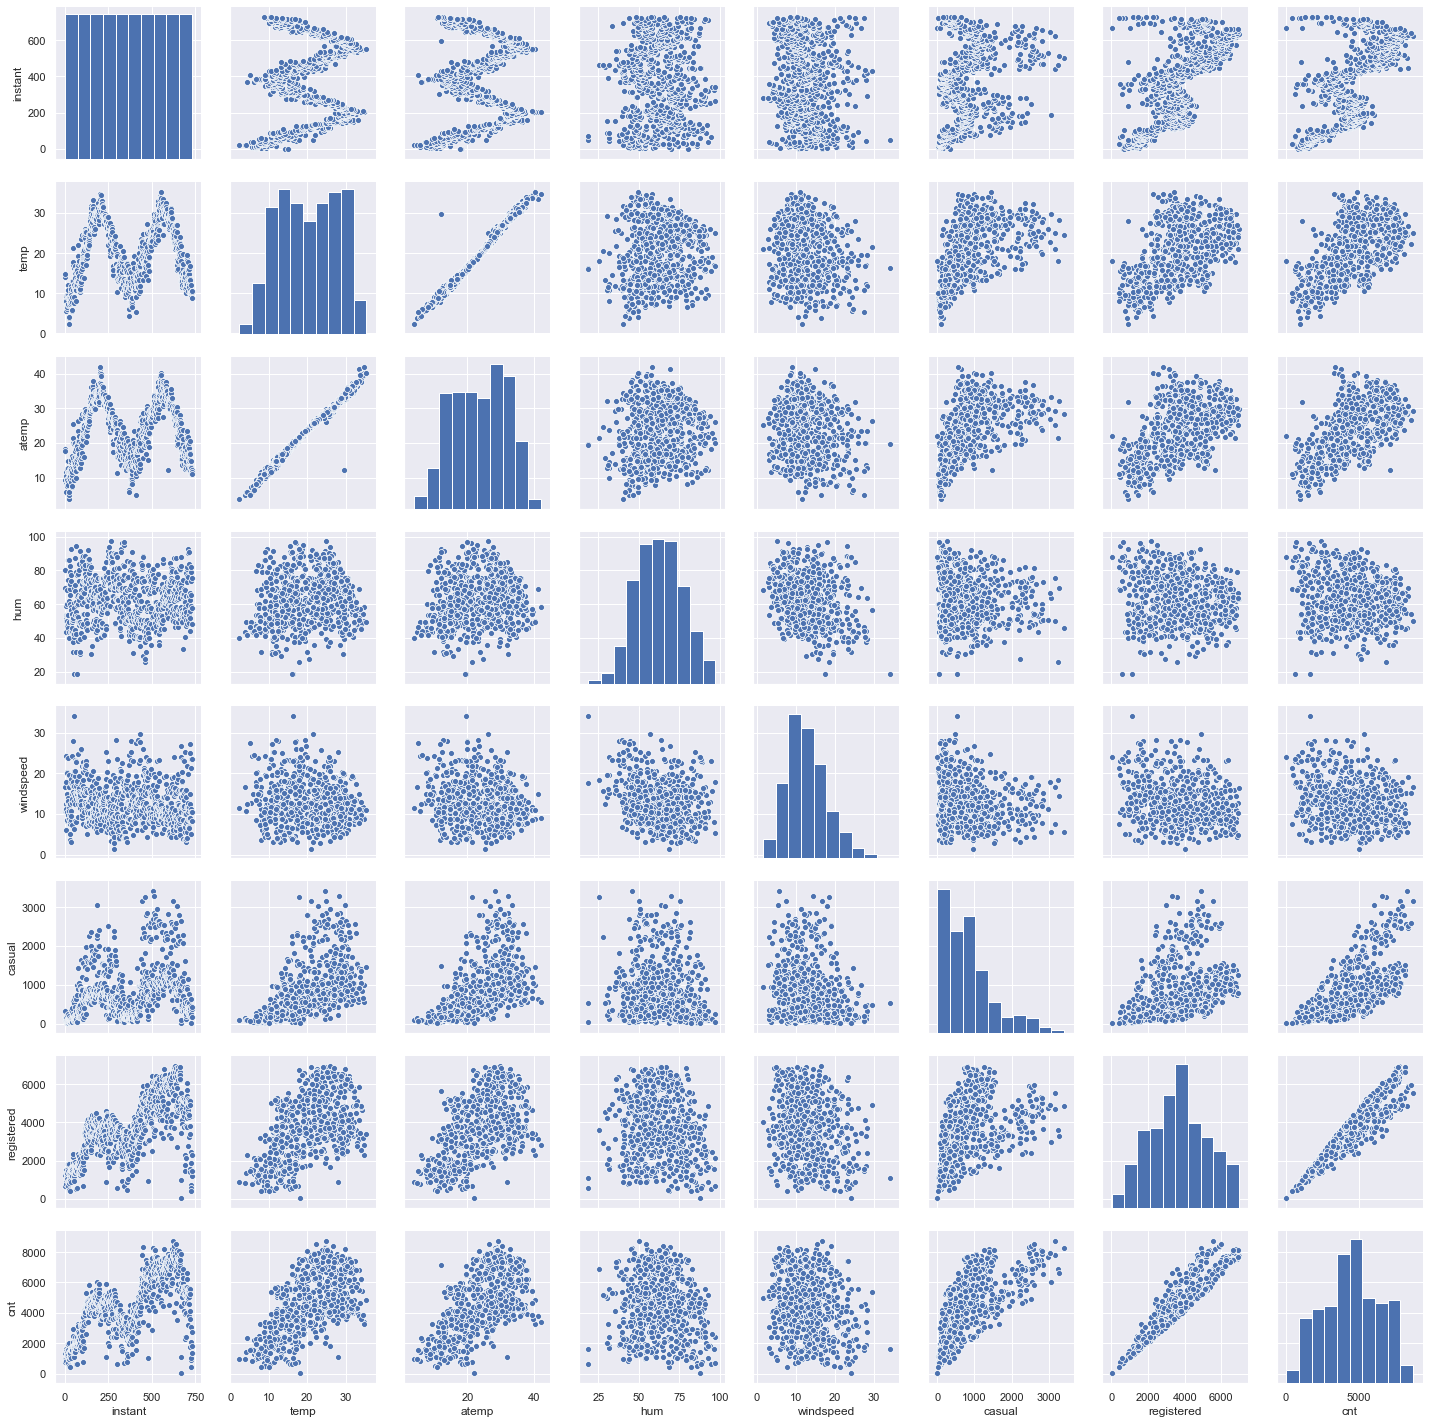

In [208]:
sns.pairplot(bike_num)
plt.show()

### Date Vs cnt - Bivariate Analysis

<Figure size 432x288 with 0 Axes>

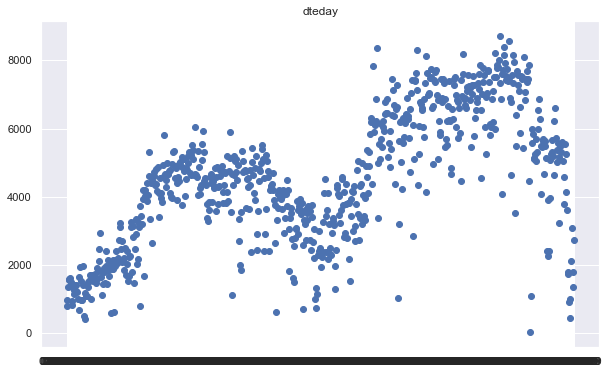

In [209]:
# PLotting the scatter plot for date Vs 'cnt' variable

sns.set(style = "darkgrid")
plt.figure(1)
plt.figure(figsize=(10,6))
plt.title('dteday')
plt.scatter(x = bike['dteday'], y = bike['cnt'])
plt.show()

#### Inference:
Above scatterplot shows pattern same as 'instant' valriable with 'cnt' variable. Here also we can say that there no linear relation in date and 'cnt' variable as pattern is varying and not linear. So that we can say that due to absence of linear relationship we can say that we can remove 'instant' and 'dteday' column.

### Categorical to Numerical - Bivariate Analysis

<Figure size 432x288 with 0 Axes>

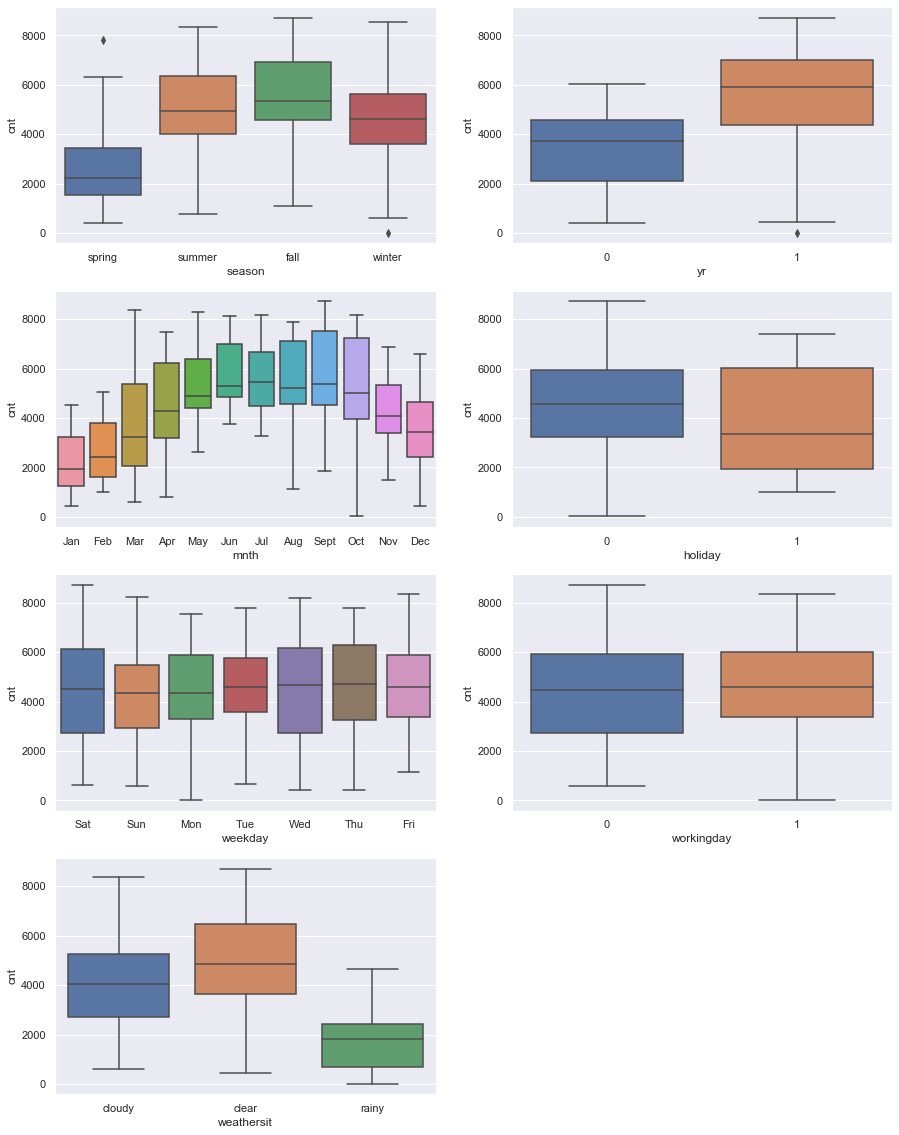

In [210]:
# Plotting box plots for categorical variables Vs 'cnt' variable for bivariate analysis

sns.set(style = "darkgrid")
plt.figure(1)
plt.figure(figsize=(15,20))

i = 1

for item in column_categorical:
    plt.subplot(4, 2, i)
    #plt.title(item)
    sns.boxplot(x = item, y = 'cnt', data = bike)
    i = i+1

plt.show()

Inference:
1. For 'season' variable, there is significant change in median values of 'cnt' for different seasons so 'season' variable will be significant in linear regression modelling.
2. For 'yr' variable, there is significant change in median values of 'cnt' for different years so 'yr' variable will be significant in linear regression modelling.
3. For 'mnth' variable, there is significant change in median values of 'cnt' for different months so 'mnth' variable will be significant in linear regression modelling.
4. For 'weathersit' variable, there is significant change in median values of 'cnt' for different weathers so 'weathersit' variable will be significant in linear regression modelling.
5. For 'holiday' variable, the median value for holiday and non-holiday is significantly different so it may be significant for linear regression.
6. For 'weekday' column median value for 'cnt' is same for all days, but range is varying so it may be significant for modelling.
7. For 'workingday' variable, median value of 'cnt' varibale is same also most of the data is overlapping so it may not be significant for linear regression modelling.

So summary is,
1. 'season', 'yr', 'mnth', 'weathersit', 'holiday' - Significant
2. 'weekday' - May be significant
3. 'workingday' - non-significant

# Step 5 - Correlation between numerical variables

In [211]:
bike_corr_mat = bike.corr()
bike_corr_mat

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.013627,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.115141,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.016083,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.024600,-0.018666,-0.517607,0.305437,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128386,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141489,-0.183876,0.543362,0.543678,0.630685
hum,0.013627,-0.115141,-0.016083,0.024600,0.128386,0.141489,1.000000,-0.248532,-0.077860,-0.093425,-0.102877
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248532,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.077860,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.093425,-0.217914,0.394137,1.000000,0.945411


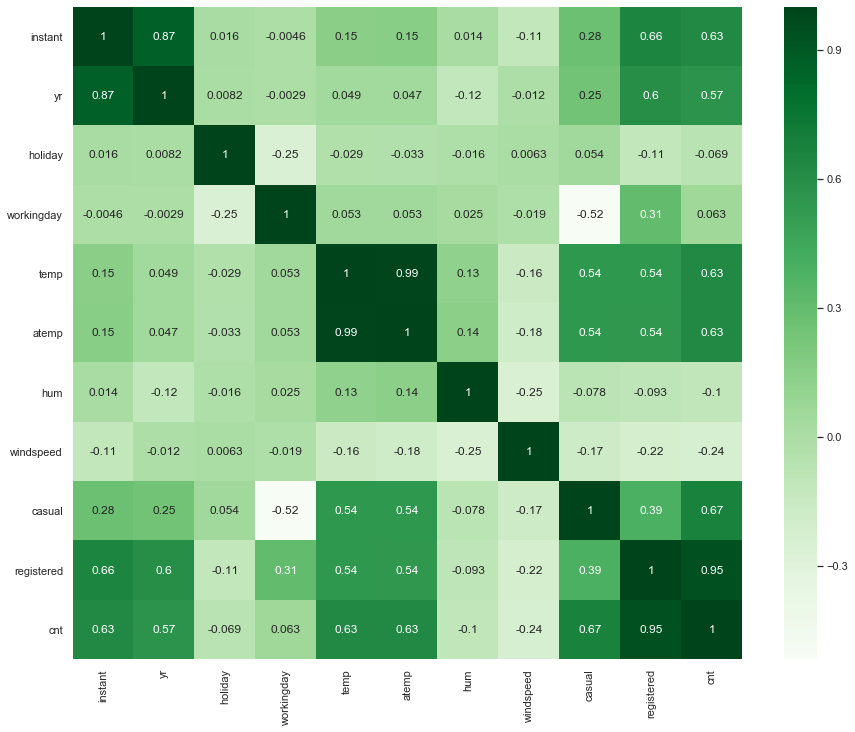

In [212]:
plt.figure(figsize=(15, 12))
ax = sns.heatmap(bike_corr_mat, annot = True, cmap = 'Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [213]:
corr_1 = bike_corr_mat.where(np.triu(np.ones(bike_corr_mat.shape), k=1).astype(np.bool))
corr_bike = corr_1.unstack().reset_index()
corr_bike.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_bike = corr_bike.dropna(subset = ['Correlation'])
corr_bike.Correlation = abs(corr_bike.Correlation)
corr_bike.sort_values("Correlation", ascending=False).head(10)

,VAR1,VAR2,Correlation
59,atemp,temp,0.991696
119,cnt,registered,0.945411
11,yr,instant,0.866026
118,cnt,casual,0.672123
99,registered,instant,0.660544
115,cnt,atemp,0.630685
110,cnt,instant,0.629896
114,cnt,temp,0.627044
100,registered,yr,0.596911
111,cnt,yr,0.569728


#### This above table gives you the top 10 correlation. The highest correlation values in between 'temp' and 'atemp' variable which is equal to 0.991696 which shows that 'temp' and 'atemp' are actually has strong correlation and one of them can be removed for linear regression model building.

# Step 6 -  Creating Dummy variables

#### Converting season column values in string and creating dummy variable

In [214]:
season_status = pd.get_dummies(bike['season'], drop_first = True)
season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Converting weathersit column values in string and creating dummy variable

In [215]:
weather_status = pd.get_dummies(bike['weathersit'], drop_first = True)
weather_status.head()

,cloudy,rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


There is no 4th weather category present in the weathersit column so only 2 dummy variables are created.

#### Creating dummy variables for mnth column

In [216]:
mnth_status = pd.get_dummies(bike['mnth'], drop_first = True)
mnth_status.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Creating dummy variables for weekday column

In [217]:
weekday_status = pd.get_dummies(bike['weekday'], drop_first = True)
weekday_status.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


#### Adding the dummy variable column to original bike dataframe

In [218]:
bike = pd.concat([bike, season_status], axis = 1)
bike = pd.concat([bike, weather_status], axis = 1)
bike = pd.concat([bike, mnth_status], axis = 1)
bike = pd.concat([bike, weekday_status], axis = 1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
0,1,01-01-2018,spring,0,Jan,0,Sat,0,cloudy,14.110847,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,Sun,0,cloudy,14.902598,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


# Step 7 - Removing insignificant columns and columns for whom dummy variables are created

In [219]:
bike.drop(['instant','dteday','season','weathersit','mnth', 'weekday'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


So this is our final dataframe prepared for Linear regression modelling having 32 columns.

# Step 8 - Bulding 1st model lr_1

### Splitting data in train and test datasets

In [220]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the numeraical columns in train dataset

In [221]:
# Scaling the numerical variables
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])


### Creating X_train and y_train variables

In [222]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Adding constant and creating first fitted model lr_1

In [223]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

### Printing summary for model lr_1

In [224]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.997e+29
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:03:24   Log-Likelihood:                 16890.
No. Observations:                 510   AIC:                        -3.372e+04
Df Residuals:                     479   BIC:                        -3.359e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.193e-15   4.12e-16      2.895      0.0

### Above summary shows the R-Squared and Adjusted R-Squared value as 1, which says that there is some variable present in the dataset which expains completely the 'cnt' variable.

By referring the correlation and data dictionary we come to know that values in column 'cnt' are calculated as sum of values in casual and Registered columns. So these 2 varibales only expiains 'cnt' variable completely so we can say that this is a Data Leakage problem. So we need to remove them in order to build the Linear regression model which will explain the significance of other variables.

### Removing columns 'casual' and 'registered' from dataframe

In [225]:
bike.drop(['casual','registered'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


# Step 9 - Using RFE (Recursive Feature Elimination) method to get 15 significant varibales out of 29 variables

### Splitting of dataset, Scaling and creating X_train and y_train dataset

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

y_train = bike_train.pop('cnt')
X_train = bike_train

### Importing libraries and RFE model creation for 15 output variables

In [227]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm_model = lm.fit(X_train, y_train)

rfe = RFE(lm_model, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [228]:
# Creating list of RFE output with variable significance and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('rainy', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 15)]

In [229]:
# list for which RFE support is true and variable is significant
col_true = X_train.columns[rfe.support_]
col_true

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'cloudy', 'rainy', 'Jul', 'Sept', 'Sat', 'Sun'],
      dtype='object')

In [230]:
# list for which RFE support is flase and variable is not significant
col_false = X_train.columns[~rfe.support_]

In [231]:
col_false

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

# Step 11 - Removing columns from dataframe for which RFE does not support
Removed columns 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct','Mon', 'Thu', 'Tue', 'Wed'

In [232]:
X_train = X_train.drop(col_false, axis = 1)

# Step 12 - Bulding 2nd model lr_2

In [233]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [234]:
# Printing summary for lr_2 model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          9.98e-192
Time:                        20:03:34   Log-Likelihood:                 517.99
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1751      0.025      6.969      0.0

In [235]:
# Calculating VIF values for variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_lm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.54
13,Sat,10.15
14,Sun,9.76
6,spring,5.03
3,temp,3.64
8,winter,3.50
7,summer,2.62
1,holiday,2.56
4,hum,1.97
9,cloudy,1.60


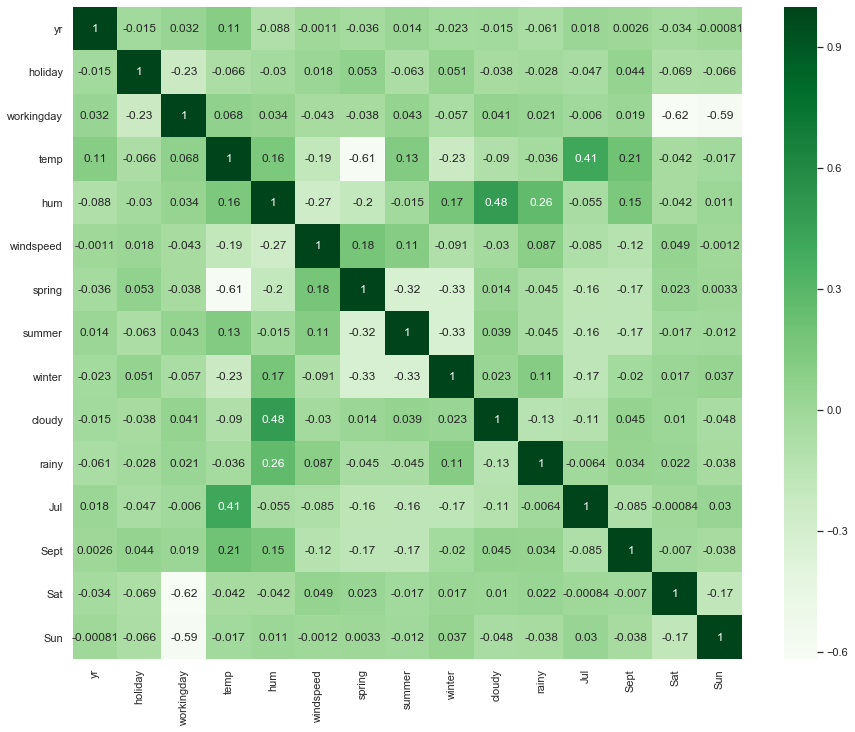

In [236]:
# Heatmap tocheck correlation between independent variables
plt.figure(figsize=(15, 12))
ab = sns.heatmap(X_train.corr(), annot = True, cmap = 'Greens')
bottom, top = ab.get_ylim()
ab.set_ylim(bottom+0.5, top-0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

### model lr_2 inference : 

There are many varibales present with high p-values (grater than 0.05) and high VIF value showing milticollinearity present in model. So we can not trust this model.

# Step 13 - Bulding 3rd model lr_3
### Removed column 'workingday' due to high VIF and high p-value and building model lr_3

In [237]:
X_train = X_train.drop('workingday', axis = 1)

In [238]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [239]:
# Printing summary for lr_3 model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          9.98e-192
Time:                        20:03:39   Log-Likelihood:                 517.99
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2529      0.031      8.193      0.0

In [240]:
# Calculating VIF values for independent variables
vif = pd.DataFrame()
X = X_train_lm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.80
2,temp,12.70
4,windspeed,4.80
5,spring,3.27
7,winter,2.86
6,summer,2.56
8,cloudy,2.42
0,yr,2.09
10,Jul,1.59
11,Sept,1.37


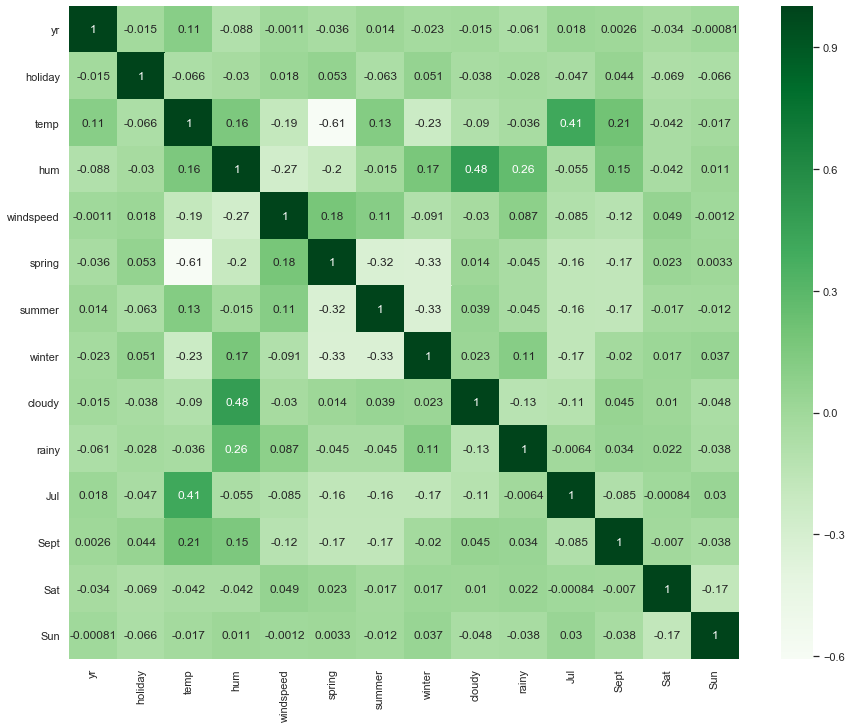

In [241]:
# Heatmap to check correlation between independent variables
plt.figure(figsize=(15, 12))
ac = sns.heatmap(X_train.corr(), annot = True, cmap = 'Greens')
bottom, top = ac.get_ylim()
ac.set_ylim(bottom+0.5, top-0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

### model lr_3 inference :
There is one varibale present with high p-values (grater than 0.05) and high VIF values for some variables showing milticollinearity present in model. So we can not trust this model.

# Step 14 - Bulding 4th model lr_4
### Removed column 'Sat' due to high P-Value so it is not significant to predict 'cnt' variable and building model lr_4

In [242]:
X_train = X_train.drop('Sat', axis = 1)

In [243]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [244]:
# Printing summary for model lr_4
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          9.89e-193
Time:                        20:03:43   Log-Likelihood:                 517.59
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2552      0.031      8.303      0.0

In [245]:
# Calculating VIF values for independent variables
vif = pd.DataFrame()
X = X_train_lm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.80
2,temp,12.64
4,windspeed,4.77
5,spring,3.24
7,winter,2.83
6,summer,2.56
8,cloudy,2.42
0,yr,2.08
10,Jul,1.59
11,Sept,1.37


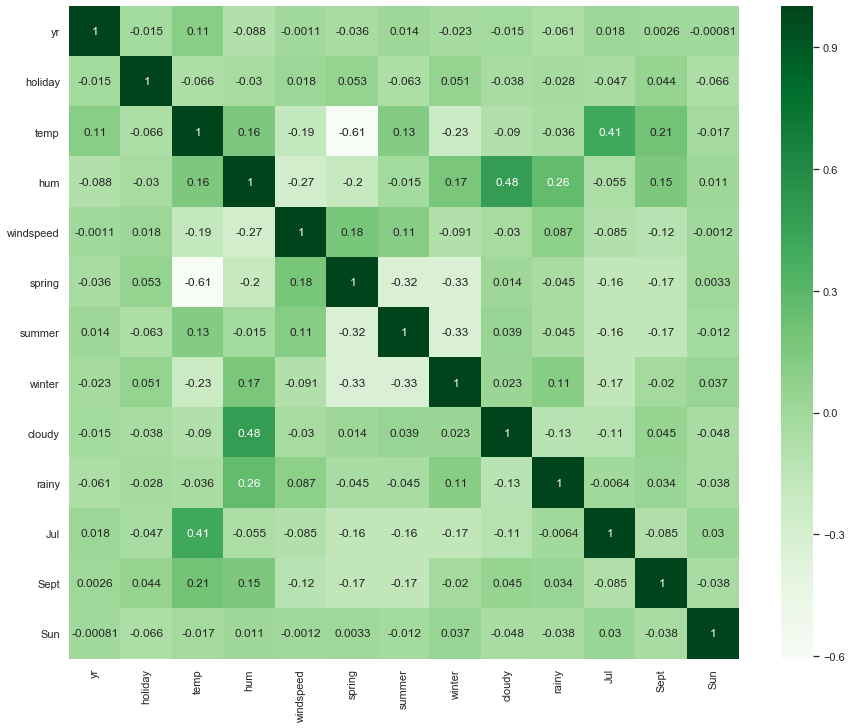

In [246]:
plt.figure(figsize=(15, 12))
ad = sns.heatmap(X_train.corr(), annot = True, cmap = 'Greens')
bottom, top = ad.get_ylim()
ad.set_ylim(bottom+0.5, top-0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

### model lr_4 inference :
There is no varibale present with high p-values (grater than 0.05) but high VIF values for some variables shows that milticollinearity present in model. So we can not trust this model. We can see that there is 'hum' variable has high VIF value and it is highly correlated with 'cloudy' variable which is logocal.

# Step 15 - Bulding 5th model lr_5
### Removed column 'hum' due to high VIF and high collinearity with 'cloudy' variable

In [247]:
X_train = X_train.drop('hum', axis = 1)

In [248]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [249]:
# printing summary for model lr_5
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          6.45e-190
Time:                        20:03:47   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2063      0.029      7.088      0.0

In [250]:
# Calucalting VIF value for independent variables
vif = pd.DataFrame()
X = X_train_lm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.22
4,spring,2.11
0,yr,2.07
6,winter,1.82
9,Jul,1.59
7,cloudy,1.55
10,Sept,1.34
11,Sun,1.18


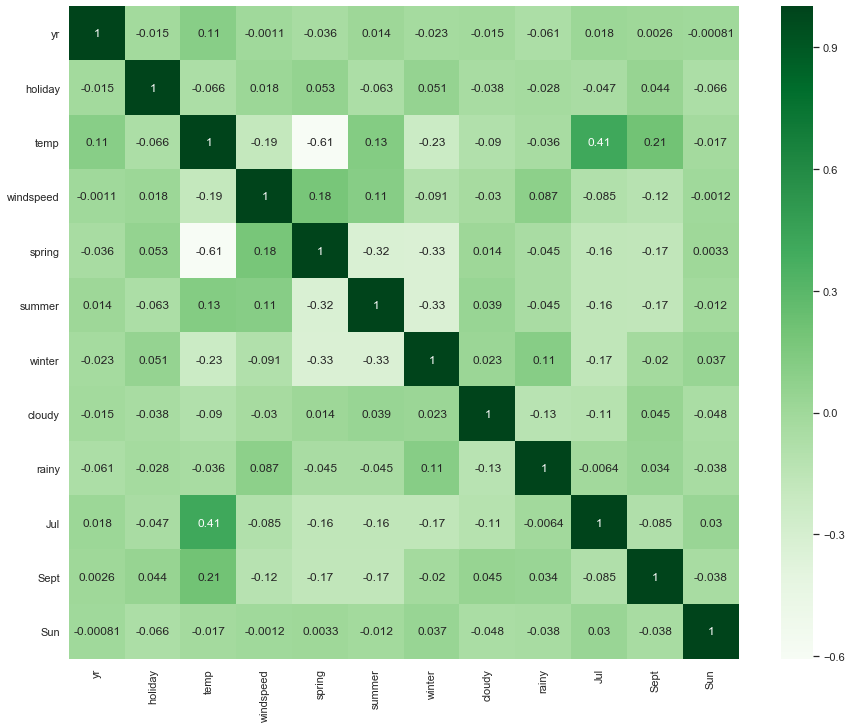

In [251]:
# Heatmap to check correlation between independent variables
plt.figure(figsize=(15, 12))
ae = sns.heatmap(X_train.corr(), annot = True, cmap = 'Greens')
bottom, top = ae.get_ylim()
ae.set_ylim(bottom+0.5, top-0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

### model lr_5 inference :
There is no varibale present with high p-values (grater than 0.05) but high VIF values for temp variables shows that milticollinearity present in model. We can see that 'temp' variable has high VIF value and it is highly correlated with 'Jul' which is logical as 'Jul' month comes in summer season when temp is high. But variable 'temp' is more significant than 'Jul' if we look at p-values. So we will remove 'Jul' variable and build next model lr_6.

# Step 16 - Bulding 6th model lr_6
### Removed column 'Jul' due to high collinearity with 'temp' variable and building model lr_6

In [252]:
X_train = X_train.drop('Jul', axis = 1)

In [253]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [254]:
# Printing summary for model lr_6 
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.51e-189
Time:                        20:03:52   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1983      0.029      6.806      0.0

In [255]:
# Calculating  VIF values for independent variables
vif = pd.DataFrame()
X = X_train_lm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,yr,2.07
4,spring,2.02
5,summer,1.90
6,winter,1.66
7,cloudy,1.55
9,Sept,1.23
10,Sun,1.18
8,rainy,1.08


### model lr_6 inference :

#### 1. This model has all variables with p-values less than 0.05 and VIF for each variable is less than 5.
#### 2. Adjusted R-Squared for lr_6 model =  0.836 which is descent to expain the variance in the output prediction.
#### 3. F-Statistics = 236.1

So by above observation we can say that model lr_6 is good enough to predict values and we can trust this model.

# Step 17 - Residual Analysis of the train data

### Predicting the values of 'cnt' for train data and storing in 'y_train_cnt' variable

In [256]:
y_train_cnt = lr_6.predict(X_train_lm)

### Calculating residual errors and storing in 'res_train' variable for train data

In [257]:
res_train = y_train - y_train_cnt

### Checking the Errors distribution on train data to verify the assumption that Error distribution is normal and mean is 0.

Text(0.5, 0, 'Errors')

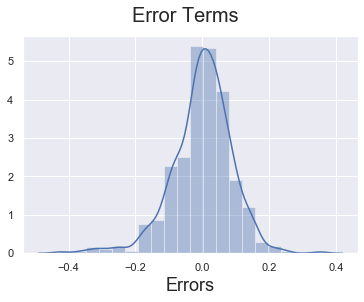

In [258]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### From above Histogram of error terms we can say that error distribution is Normal and mean is 0.

### Error Pattern in train data

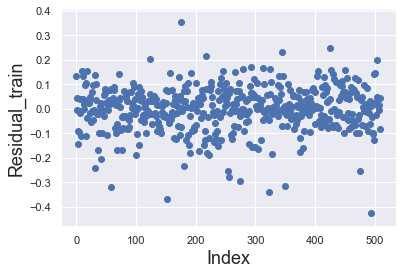

In [259]:
# Error terms patterns
c = [i for i in range(len(y_train_cnt))]
fig = plt.figure()
plt.scatter(c,res_train)
plt.xlabel('Index', fontsize = 18) 
plt.ylabel('Residual_train', fontsize = 18) 
plt.show()

#### The above plot shows the error pattern are random and no pattern is present so they are independent on each other.

### Checking Homoscedesticity for lr_6 model

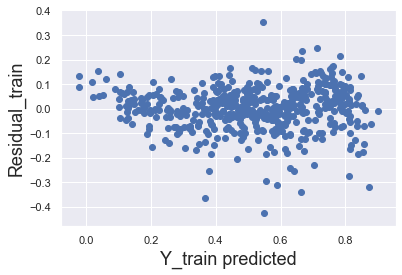

In [260]:
fig = plt.figure()
plt.scatter(y_train_cnt,res_train)
plt.xlabel('Y_train predicted', fontsize = 18) 
plt.ylabel('Residual_train', fontsize = 18)
plt.show()

#### Above scatter plot shows that the variance in the predicted values for train data is almost constant and it does not follow the cone shaped.

# Step 18 - Making Predictions Using the Final Model lr_6

### Applying the scaling on the test sets

In [261]:
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])


### Creating X_test and y_test datasets

In [262]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [263]:
X_test_lr_6 = sm.add_constant(X_test)

### Removing columns 'atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu', 'Tue', 'Wed', 'workingday','Sat','hum','Jul' - These are same columns we have dropped in train data set

In [264]:
X_test_lr_6 = X_test_lr_6.drop(col_false, axis = 1)
X_test_lr_6 = X_test_lr_6.drop(['workingday','Sat','hum','Jul'], axis = 1)

### Prdicting the values based on model lr_6

In [265]:
y_pred_lr_6 = lr_6.predict(X_test_lr_6)

# Step 19 - Model Evaluation

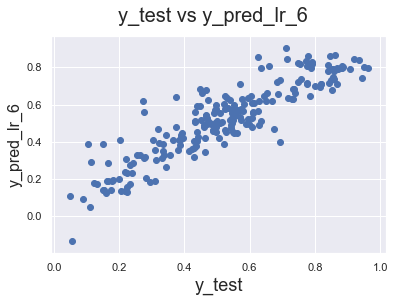

In [266]:
# Plotting y_test and y_pred_lr_6 to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lr_6)
fig.suptitle('y_test vs y_pred_lr_6', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_lr_6', fontsize = 16)
plt.show()

### Residual analysis on test data

In [267]:
res_test = (y_test - y_pred_lr_6)

Text(0.5, 0, 'Errors')

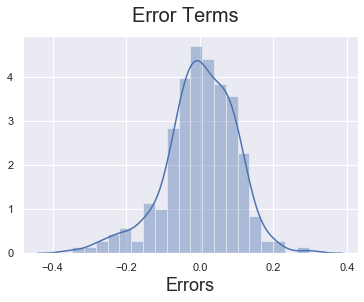

In [268]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### The above plot shows that errors are distribute Normally and mean is 0.

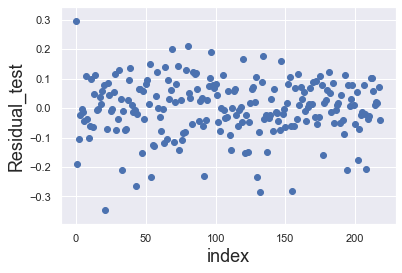

In [269]:
# Error terms patterns
c = [i for i in range(len(y_pred_lr_6))]
fig = plt.figure()
plt.scatter(c,res_test)
plt.xlabel('index', fontsize = 18) 
plt.ylabel('Residual_test', fontsize = 18)
plt.show()

#### The above plot shows the error pattern are random and no pattern is present so they are independent on each other.

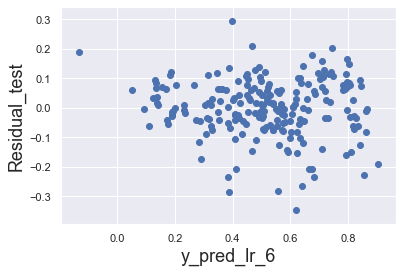

In [270]:
# Error terms patterns
fig = plt.figure()
plt.scatter(y_pred_lr_6,res_test)
plt.xlabel('y_pred_lr_6', fontsize = 18) 
plt.ylabel('Residual_test', fontsize = 18)
plt.show()

#### Above scatter plot shows that the variance in the predicted values for test data is almost constant and it does not follow the cone shaped pattern.

# Step 20 - Calculation of adjusted r-squared and RMSE for test data

In [271]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [272]:
adjusted_r_squared_test_data = r2_score(y_test, y_pred_lr_6)
print(round(adjusted_r_squared_test_data,4))

0.806


The adjusted R-squared value for test data is calculated as 0.806 which is close to lr_6 model R-squared value i.e. 0.836. So we can trust these values and model

In [273]:
#Returns the mean squared error; we'll take a square root
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_lr_6))
print(round(RMSE,4))

0.096


Here RMSE value is 0.096 which indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. As Lower values of RMSE indicate better fit we can say that lr_6 model is a good fit model.

 # Step 21 - Equation for best fitted line as per model lr_6
 
$ cnt = 0.1983 + (0.2339 \times yr) - (0.1048 \times holiday) + (0.4786 \times temp) - (0.1481 \times windspeed) - (0.0541 \times spring) + (0.0612 \times summer) + (0.0983 \times winter) - (0.0822 \times cloudy) - (0.2913 \times rainy) + (0.0893 \times Sept) - (0.0496 \times Sun) $

### Conclusion : 

1. Final model R-Squared = 0.839
2. Final model adjusted R-Squared for train data = 0.836
3. Final model F statistics = 236.1
4. Adjusted R-squared for test data = 0.806
5. RMSE = 0.096

### Observations for lr_6 model assumptions : 
1. There is a linear relationship between X variables and 'cnt' as a Y variable
2. Error terms are normally distributed and mean is 0
3. Error terms are independent of each other as they are random.
4. Error terms have constant variance (homoscedasticity).

### Top 5 features
1. temp
2. rainy
3. yr
4. windspeed
5. holiday

# ----------------------------------------End of Assignment---------------------------------------------